### 1. Se pide: (regression)

A partir del archivo "USA_Housing.csv", realizar la regresión no lineal entre cada columna numérica con la columna 'price' utilizando:

- SVR

In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from decimal import *
df = pd.read_csv("USA_Housing.csv")
df

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0                             4.09     23086.800503  1.059034e+06   
1                             3.09     40173.072174  1.505891e+06   
2                             5.13     36882.159400  1.058988e+06   
3                             3.26     34310.242831  1.260617e+06   
4                             4.23     26354.109472  6.309435e+05   
...                            ...              ...           ...   
4995                          3.46     22837.361035  1.060194e+06   
4996                          4.02     25616.115489  1.482618e+06   
4997                          2.13     33266.145490  1.030730e+06   
4998                          5.44     42625.620156  1.198657e+06   
4999                          4.07     46501.283803  1.298950e+06   

                                                Address  
0     208 Michael Ferry Apt. 674\r\nLaurabury, NE 37...  
1     188 Johnson Views Suite 079\r\nLake Kathleen, ...  
2     9127 Elizabeth Stravenue\r\nDanieltown, WI 064...  
3                           USS Barnett\r\nFPO AP 44820  
4                          USNS Raymond\r\nFPO AE 09386  
...                                                 ...  
4995                 USNS Williams\r\nFPO AP 30153-7653  
4996            PSC 9258, Box 8489\r\nAPO AA 42991-3352  
4997  4215 Tracy Garden Suite 076\r\nJoshualand, VA ...  
4998                        USS Wallace\r\nFPO AE 73316  
4999  37778 George Ridges Apt. 509\r\nEast Holly, NV...  

[5000 rows x 7 columns]

### 2. Se pide: (classification)

En el anterior dataset, la columna "Avg. Area Number of Bedrooms" está en un rango numérico limitado:

1. Cambia todos los datos para que sean enteros redondeando hacia el entero más cercano. Si es .5 exacto, se redondea hacia abajo.

2. Cuando lo hayas hecho, tendrás una columna con números enteros en un rango limitado. Ahora trata a esa columna como una serie de valores discretos (classes, labels). 

3. Usando las demás columnas numéricas y una a una, utiliza SVM (SVC) para clasificar esa columna modificada.

4. Usando todas las demás columnas a la vez, utiliza SVM para clasificar esa columna modificada. Es decir, "Avg. Area Income" con nuestro target, después "Avg. Area House Age", ... ¿hace aumentar el score? ¿por qué? 

5. ¿Qué columna tiene mejor correlación con "Avg. Area Number of Bedrooms" una vez modificada? ¿qué columna da mejor score para nuestro target? 

-------------------------- 

ACLARACIÓN del apartado 2 del ejercicio 2:

- En el punto 3, se espera que tu X sea una sola columna e y también, 'Avg. Area Number of Bedrooms'.

- En el punto 4, se espera que tu X sean todas las columnas que cumplen con las características especificadas y la columna 'Avg. Area Number of Bedrooms'

## EJERCICIO 1

In [6]:
df = df.drop("Address",axis=1)

In [8]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

(4000, 1)
(1000, 1)
train score: 0.0013119771385015078
test score: 0.0012754233119542935


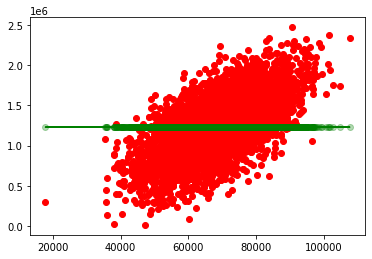

In [9]:
    X = np.array(df["Avg. Area Income"]).reshape(-1, 1)
    y = np.array(df["Price"])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
    print(X_train.shape)
    print(X_test.shape)
    svr_rbf = SVR()
    model = svr_rbf.fit(X_train, y_train)
    print("train score:", model.score(X_train, y_train))
    print("test score:", model.score(X_test, y_test))

    y_prediction = model.predict(X)
    plt.scatter(X, y, color='red')
    plt.scatter(X, y_prediction, color='green', alpha=0.3)
    plt.plot(X, y_prediction, color='green')

(4000, 1)
(1000, 1)
train score: 0.0007120249298012693
test score: 0.0005557869244640079


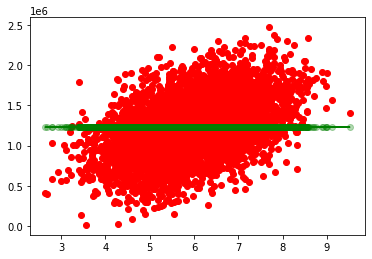

In [10]:
    X = np.array(df["Avg. Area House Age"]).reshape(-1, 1)
    y = np.array(df["Price"])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
    print(X_train.shape)
    print(X_test.shape)
    svr_rbf = SVR()
    model = svr_rbf.fit(X_train, y_train)
    print("train score:", model.score(X_train, y_train))
    print("test score:", model.score(X_test, y_test))

    y_prediction = model.predict(X)
    plt.scatter(X, y, color='red')
    plt.scatter(X, y_prediction, color='green', alpha=0.3)
    plt.plot(X, y_prediction, color='green')

(4000, 1)
(1000, 1)
train score: 0.00027074523003212114
test score: 0.00016020230882629605


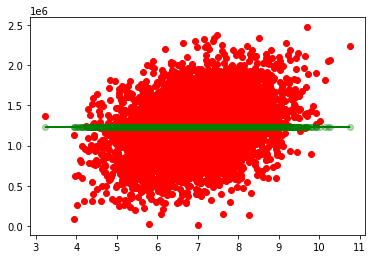

In [11]:
    X = np.array(df["Avg. Area Number of Rooms"]).reshape(-1, 1)
    y = np.array(df["Price"])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
    print(X_train.shape)
    print(X_test.shape)
    svr_rbf = SVR()
    model = svr_rbf.fit(X_train, y_train)
    print("train score:", model.score(X_train, y_train))
    print("test score:", model.score(X_test, y_test))

    y_prediction = model.predict(X)
    plt.scatter(X, y, color='red')
    plt.scatter(X, y_prediction, color='green', alpha=0.3)
    plt.plot(X, y_prediction, color='green')

(4000, 1)
(1000, 1)
train score: 4.6256670241162645e-05
test score: -6.911315516666683e-05


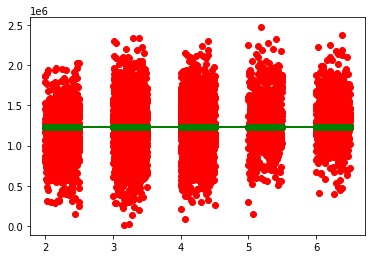

In [13]:
    X = np.array(df["Avg. Area Number of Bedrooms"]).reshape(-1, 1)
    y = np.array(df["Price"])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
    print(X_train.shape)
    print(X_test.shape)
    svr_rbf = SVR()
    model = svr_rbf.fit(X_train, y_train)
    print("train score:", model.score(X_train, y_train))
    print("test score:", model.score(X_test, y_test))

    y_prediction = model.predict(X)
    plt.scatter(X, y, color='red')
    plt.scatter(X, y_prediction, color='green', alpha=0.3)
    plt.plot(X, y_prediction, color='green')

(4000, 1)
(1000, 1)
train score: 0.00027074523003212114
test score: 0.00016020230882629605


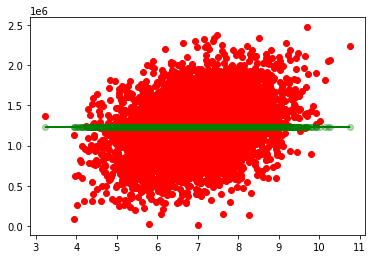

In [14]:
    X = np.array(df["Avg. Area Number of Rooms"]).reshape(-1, 1)
    y = np.array(df["Price"])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
    print(X_train.shape)
    print(X_test.shape)
    svr_rbf = SVR()
    model = svr_rbf.fit(X_train, y_train)
    print("train score:", model.score(X_train, y_train))
    print("test score:", model.score(X_test, y_test))

    y_prediction = model.predict(X)
    plt.scatter(X, y, color='red')
    plt.scatter(X, y_prediction, color='green', alpha=0.3)
    plt.plot(X, y_prediction, color='green')

(4000, 1)
(1000, 1)
train score: 4.6256670241162645e-05
test score: -6.911315516666683e-05


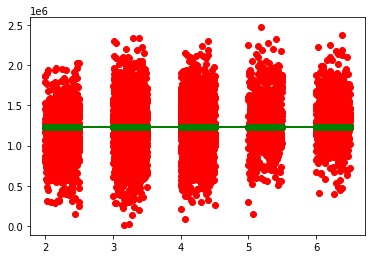

In [16]:
X = np.array(df["Avg. Area Number of Bedrooms"]).reshape(-1, 1)
y = np.array(df["Price"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
print(X_train.shape)
print(X_test.shape)
svr_rbf = SVR()
model = svr_rbf.fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score:", model.score(X_test, y_test))

y_prediction = model.predict(X)
plt.scatter(X, y, color='red')
plt.scatter(X, y_prediction, color='green', alpha=0.3)
plt.plot(X, y_prediction, color='green')

(4000, 1)
(1000, 1)
train score: 0.0005424283045755152
test score: 0.0003382822639506067


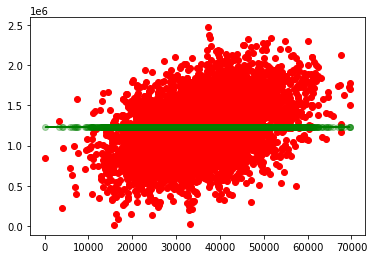

In [17]:
X = np.array(df["Area Population"]).reshape(-1, 1)
y = np.array(df["Price"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
print(X_train.shape)
print(X_test.shape)
svr_rbf = SVR()
model = svr_rbf.fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score:", model.score(X_test, y_test))

y_prediction = model.predict(X)
plt.scatter(X, y, color='red')
plt.scatter(X, y_prediction, color='green', alpha=0.3)
plt.plot(X, y_prediction, color='green')

## Ejercicio 2

In [18]:
df["Avg. Area Number of Bedrooms"] = df["Avg. Area Number of Bedrooms"].apply(lambda x: Decimal(str(x)).quantize(Decimal('0'), rounding=ROUND_HALF_DOWN))

In [19]:
y = df["Avg. Area Number of Bedrooms"]
X = np.array(df["Avg. Area Income"])
X= X.reshape(-1,1)